In [1]:
import numpy as np
import os
import scipy.stats as sps

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import qp

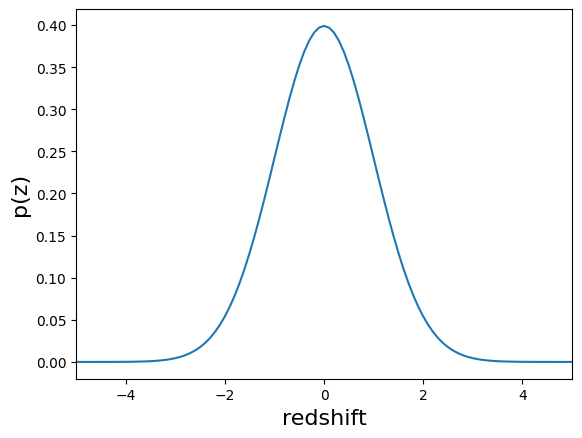

In [3]:
loc1 = np.array([[0]])
scale1 = np.array([[1]])
norm_dist1 = qp.stats.norm(loc=loc1, scale=scale1)
fig, axes = qp.plotting.plot_native(norm_dist1, xlim=(-5., 5.))

In [4]:
xvals = np.linspace(-5, 5, 11)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quantile values to compute the locations for
quants = np.linspace(0.01, 0.99, 5)
print(quants)

# Compute the corresponding locations using the inverse CDF (percent point function)
locs = np.squeeze(norm_dist1.ppf(quants))  # Ensure locs is 1D

# Construct the quantile distribution
quant_dist = qp.quant(quants=quants, locs=locs)
quant_vals = quant_dist.pdf(xvals)
print("The input and output shapes are:", xvals.shape, quant_vals.shape)

[0.01  0.255 0.5   0.745 0.99 ]
The input and output shapes are: (11,) (11,)


dual_spline_average


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

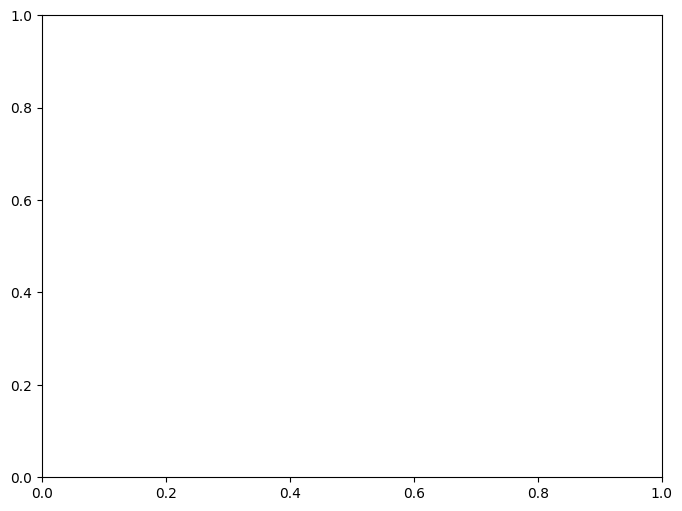

In [10]:
# Construct a single PDF for plotting without changing the shape of locs
quant_dist1 = qp.quant(quants=np.atleast_1d(quants), locs=np.atleast_2d(locs))
# quant_dist1.dist.pdf_constructor_name = 'piecewise_linear'
# quant_dist1.dist.pdf_constructor_name = 'piecewise_constant'
# quant_dist1.dist.pdf_constructor_name = 'cdf_spline_derivative'
quant_dist1.dist.pdf_constructor_name = 'dual_spline_average'
print(quant_dist1.dist.pdf_constructor_name)

# PDF and CDF values
pdf_vals = np.squeeze(quant_dist1.pdf(xvals))
cdf_vals = np.squeeze(quant_dist1.cdf(xvals))

# Now, replace the plot_native call with Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the quantiles as vertical lines (ensure locs are scalar values)
for loc in locs:
    ax.axvline(x=loc, ymin=0, ymax=0.1, color='purple', label='quantiles')

# Plot PDF with dashed line
ax.plot(xvals, pdf_vals, label="quantiles", color='purple', linestyle='--')

# Customize the plot
ax.set_xlim(-5., 5.)
ax.set_ylim(0, max(pdf_vals) * 1.2)  # Adjust y-limits for better viewing
ax.set_title('Quantile Distribution Plot')
ax.set_xlabel('redshift')
ax.set_ylabel('p(z)')
ax.grid(True)

# Add legend (ensure no duplicate labels)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.show()

[0.01       0.17333333 0.33666667 0.5        0.66333333 0.82666667
 0.99      ]
The input and output shapes are: (11,) (1, 11)
piecewise_linear
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[[nan nan nan 0.1 0.1 0.1 0.1 0.1 nan nan nan]]
[[0.         0.         0.         0.04264649 0.15912777 0.5
  0.84087223 0.95735351 1.         1.         1.        ]]


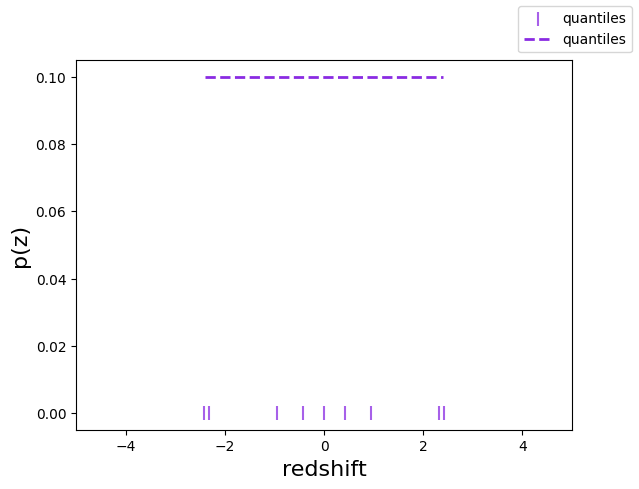

In [12]:
# Define the quantile values to compute the locations for
quants = np.linspace(0.01, 0.99, 7)
# quants = np.array([0.01, 0.30, 0.70, 0.99])
print(quants)
# Compute the corresponding locations
locs = norm_dist1.ppf(quants)
# Construct the distribution using the quantile value and locations
quant_dist = qp.quant(quants=quants, locs=locs)    # quant = quant_gen.create
quant_vals = quant_dist.pdf(xvals)
print("The input and output shapes are:", xvals.shape, quant_vals.shape)
# Construct a single PDF for plotting
quant_dist1 = qp.quant(quants=np.atleast_1d(quants), locs=np.atleast_2d(locs[0]))
print(quant_dist1.dist.pdf_constructor_name)
# quant_dist1.dist.pdf_constructor_name='piecewise_linear'
# quant_dist1.dist.pdf_constructor_name='piecewise_constant'
# quant_dist1.dist.pdf_constructor_name='cdf_spline_derivative'
quant_dist1.dist.pdf_constructor_name='dual_spline_average'
print(xvals)
print(quant_dist1.pdf(xvals))
print(quant_dist1.cdf(xvals))
fig, axes = qp.plotting.plot_native(quant_dist1, xlim=(-5., 5.), label="quantiles")
leg = fig.legend()

visually inspect data with plotting (look at tails, are there features in the distribution, general shape, symmetry)

In [ ]:
data = np.loadtxt("../pzdata.csv",delimiter=",")
print(data)

In [ ]:
zgrid = np.arange(0.01, 3, 0.01)
interp_dist = qp.interp(xvals=zgrid, yvals=data)
interp_vals = interp_dist.pdf(zgrid)
print("The input and output shapes are:", zgrid.shape, interp_vals.shape)
# Construct a single PDF for plotting
interp_dist1 = qp.interp(xvals=zgrid, yvals=np.atleast_2d(data[0]))
fig, axes = qp.plotting.plot_native(interp_dist1, xlim=(0.01, 0.2), label="interpolated")
leg = fig.legend()

change 7 to diff numbers for
quants = np.linspace(0.01, 0.99, 7)

In [ ]:
# Define the quantile values to compute the locations for
quants = np.linspace(0.01, 0.99, 50)
# quants = np.array([0.01, 0.30, 0.70, 0.99])
print(quants)
# Compute the corresponding locations
locs = norm_dist1.ppf(quants)
# Construct the distribution using the quantile value and locations
quant_dist = qp.quant(quants=quants, locs=locs)    # quant = quant_gen.create
quant_vals = quant_dist.pdf(xvals)
print("The input and output shapes are:", xvals.shape, quant_vals.shape)
# Construct a single PDF for plotting
quant_dist1 = qp.quant(quants=np.atleast_1d(quants), locs=np.atleast_2d(locs[0]))
print(quant_dist1.dist.pdf_constructor_name)
quant_dist1.dist.pdf_constructor_name='piecewise_linear'
# quant_dist1.dist.pdf_constructor_name='piecewise_constant'
# quant_dist1.dist.pdf_constructor_name='cdf_spline_derivative'
# quant_dist1.dist.pdf_constructor_name='dual_spline_average'
print(xvals)
print(quant_dist1.pdf(xvals))
print(quant_dist1.cdf(xvals))
fig, axes = qp.plotting.plot_native(quant_dist1, xlim=(-5., 5.), label="quantiles")
leg = fig.legend()

try specifying values instead of using linspace

evaluate metrics other than just visually inspect (kld, rms)